Team 4
Guillermo Sebastian Farias Dominguez (2001725)                                   
Ismael Gutierrez Puente (1995316)                                                
Jocelyn Benitez Ramirez (2109461)

Class Day: Thursday       

# **Import libraries**

In [1]:
# General Libraries
import pandas as pd                    # Data manipulation and analysis library
import numpy as np                     # Numerical computing library
import keras                           # High-level neural networks API
import warnings                        # Control over warnings emitted by Python
import matplotlib.pyplot as plt        # Plotting library
import seaborn as sns                  # Data visualization library based on matplotlib
import random                          # Generate pseudo-random numbers
import time                            # Time-related functions

# Path Process
import os                              # Operating system interfaces
import os.path                         # Common pathname manipulations
from pathlib import Path               # Object-oriented filesystem paths
import glob                            # Unix style pathname pattern expansion
from scipy.io import loadmat           # Read .mat files
import nibabel as nib                  # Access a wide range of neuroimaging file formats
import csv                             # CSV file reading and writing

# Image Process
import cv2                             # OpenCV library for computer vision tasks
from PIL import Image                  # Python Imaging Library for opening, manipulating, and saving many different image file formats
from keras.preprocessing import image  # Image preprocessing utilities
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generate batches of tensor image data with real-time data augmentation
from keras.models import Sequential    # Sequential model API
from keras.layers import Dense, Dropout, Flatten  # Dense and Dropout layers for neural networks
from keras.layers import Conv2D, MaxPooling2D      # Convolutional and pooling layers for 2D images
from keras.applications.vgg16 import preprocess_input, decode_predictions  # Preprocessing functions for VGG16 model
from skimage.feature import hessian_matrix, hessian_matrix_eigvals           # Functions for computing Hessian matrix
from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions
from skimage import data, io, filters                                       # Image processing functions from scikit-image
import skimage                        # Image processing library
from skimage.morphology import convex_hull_image, erosion                    # Morphological operations on binary images
from IPython import display          # Interactive computing in Python

from scipy.ndimage import gaussian_filter  # Multidimensional Gaussian filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # Plotting 3D collections
import matplotlib.patches as patches                   # Functions for creating patch objects

# Scaler, Transformation and Accuracy Control
from sklearn.preprocessing import StandardScaler     # Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score  # Model evaluation metrics
from sklearn.preprocessing import MinMaxScaler       # Scale features to a range
from keras.utils import to_categorical               # Convert class vector to binary class matrix
import tensorflow as tf                              # TensorFlow machine learning library
from keras import backend as K                        # Keras backend module
from keras.utils import plot_model                   # Plot model architecture as a graph
from keras import regularizers                        # Regularization techniques for neural networks
from keras.optimizers import RMSprop, Adam, SGD, Adamax      # Optimizers for training neural networks
from tensorflow.keras.models import Sequential, Model  # Sequential and Functional API for building models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, BatchNormalization, Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D, Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate  # Layers for building neural networks
from tensorflow.keras.applications import VGG19, VGG19, inception_v3  # Pretrained models available in Keras
from tensorflow.keras.optimizers import Adam         # Adam optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Loss function for multi-class classification problems
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping  # Callbacks for training neural networks
import sklearn.metrics as metrics                    # Metrics for evaluating model performance
from keras.callbacks import LearningRateScheduler    # Callback to schedule learning rate changes during training
!pip install visualkeras
import visualkeras         #To visualize our CNNs

# IGNORING WARNINGS
from warnings import filterwarnings                # Filter warnings module
filterwarnings("ignore", category=DeprecationWarning)  # Ignore deprecation warnings
filterwarnings("ignore", category=FutureWarning)        # Ignore future warnings
filterwarnings("ignore", category=UserWarning)          # Ignore user warnings

2024-05-25 22:03:54.077358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 22:03:54.077448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 22:03:54.352496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_34/2661235081.py:30: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.9 MB/s eta 0:00:00a 0:00:01m


# **First model**
This model is going to predicate the clasification of the image 

# **Import data. First model**

In [31]:
# Defining paths to different categories of images
mild_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
moderate_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
non_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
very_mild_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

# Lists to store file paths and corresponding labels
filepaths = []  # List to store file paths
labels = []  # List to store labels

# List of paths and corresponding labels
path_label_dict_list = [mild_demented_path, moderate_demented_path, non_demented_path, very_mild_demented_path]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

# Looping through each category and extracting file paths and labels
for i, path in enumerate(path_label_dict_list):
    file_list = os.listdir(path)  # List of files in the directory
    for file in file_list:
        file_path = os.path.join(path, file)  # Full path of the file
        filepaths.append(file_path)  # Appending file path to the list
        labels.append(class_labels[i])  # Appending corresponding label to the list

# Creating Pandas Series for file paths and labels
filepaths_series = pd.Series(filepaths, name="filepaths")  # Series for file paths
labels_series = pd.Series(labels, name="labels")  # Series for labels

# Concatenating file paths and labels into a DataFrame
alzheimer_data = pd.concat([filepaths_series, labels_series], axis=1)  # Concatenating series into DataFrame
alzheimer_df = pd.DataFrame(alzheimer_data)  # Creating DataFrame from the concatenated data

In [32]:
# Split the Alzheimer_df dataset into train and test sets with a test size of 20% and a fixed random state for reproducibility
train_images, test_images = train_test_split(alzheimer_df, test_size=0.3, random_state=42)

# Further split the Alzheimer_df dataset into train and validation sets with a test size of 20% and the same random state as before
train_set, val_set = train_test_split(alzheimer_df, test_size=0.2, random_state=42)

In [33]:
# Initialize an ImageDataGenerator with preprocessing function for MobileNetV2
image_data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

# Generate train data flow from DataFrame
train_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate test data flow from DataFrame
test_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate validation data flow from DataFrame
validation_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)



KeyboardInterrupt



# **Visualizes data. First Model**

In [ ]:
classes=list(train_data_flow.class_indices.keys())

In [ ]:
def display_sample_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)
    
    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)
    
    # Determine the number of images to display, maximum 25
    if length < 25:
        num_images = length
    else:
        num_images = 25
    
    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        # Scale images between 0 and 1
        image = (images[i] + 1) / 2 
        plt.imshow(image)
        # Get the index of the predicted class
        index = np.argmax(labels[i])
        # Get the class name corresponding to the index
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
    
    # Show the plot with the images
    plt.savefig('VisualizeData_Clasification.jpeg')
    plt.show()

#Call the function
display_sample_images(train_data_flow)

# **Create Architecture. First Model**

In [ ]:
# Defining the shape of the input images
image_shape = (244, 244, 3)

# Loading the pre-trained Xception model from Keras applications
base_model = tf.keras.applications.Xception(
    include_top=False,  # Excludes the top (final) layer of the model
    weights="imagenet",  # Initializes the model with pre-trained ImageNet weights
    input_shape=image_shape,  # Shape of input images expected by the model
    pooling='max'  # Global max pooling operation for feature extraction
)

# Creating a Sequential model by stacking layers
ModelDiagnostic = Sequential([
    base_model,  # Adding the Xception base model
    Flatten(),  # Flattening the output tensor from the base model
    Dropout(rate=0.3),  # Regularization by randomly setting input units to 0 with a frequency of 0.3
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(rate=0.25),  # Regularization by randomly setting input units to 0 with a frequency of 0.25
    Dense(4, activation='softmax')  # Output layer with 4 neurons for classification using softmax activation
])

# Compiling the model with Adamax optimizer, categorical crossentropy loss, and accuracy metric
ModelDiagnostic.compile(
    optimizer=Adamax(learning_rate=0.001),  # Optimizer with a specific learning rate
    loss='categorical_crossentropy',  # Loss function for categorical classification
    metrics=['accuracy']  # Evaluation metric to monitor during training
)

# Printing the summary of the model architecture
ModelDiagnostic.summary()

# Building the model with a specified input shape
ModelDiagnostic.build(input_shape=(None, *image_shape))

# Plotting the model architecture0
tf.keras.utils.plot_model(
    ModelDiagnostic,
    to_file='Architecture_Classification.png',
    show_shapes=True,  # Displaying shapes of input/output tensors in the plot
    show_dtype=False,  # Hiding data types of tensors in the plot
    show_layer_names=True,  # Displaying names of layers in the plot
    rankdir='TB',  # Orientation of the plot (Top to Bottom)
    expand_nested=False,  # Flattening nested models for visualization
    dpi=70  # Dots per inch for the plot
)



# **Training. First Model**

In [ ]:
# Training the model using the training data for 10 epochs and validating it after each epoch using the validation data.
# Saving the training history for analysis and monitoring.
training_history = ModelDiagnostic.fit(train_data_flow, epochs=5, validation_data=validation_data_flow, validation_freq=1)

In [ ]:
# Train the model with the given training data
training_history1 = ModelDiagnostic.fit(
    train_data_flow,        # The training data provided in a flow format
    epochs=1,               # Number of epochs (iterations over the entire dataset) to train the model
    validation_data=validation_data_flow,  # The validation data provided in a flow format
    validation_freq=1       # Frequency at which the model is evaluated on the validation data (after every epoch)
)


In [ ]:
# Evaluate the model's performance on the test data and print detailed results
ModelDiagnostic.evaluate(test_data_flow, verbose=1)

# **Results. First Model**

In [ ]:
plt.plot(training_history.history['accuracy'] + training_history1.history['accuracy'])
plt.plot(training_history.history['val_accuracy'] + training_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('ModelAccuracy_Classification.jpeg')

In [ ]:
plt.plot(training_history.history['loss'] + training_history1.history['loss'])
plt.plot(training_history.history['val_loss'] + training_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('ModelLoss_Classification.jpeg')

In [ ]:
pred = ModelDiagnostic.predict(test_data_flow)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train_data_flow.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

In [ ]:
# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")
plt.savefig('ConfusionMatrix_Classification.jpeg')

# Show the plot
plt.show()

# **Prediction. First Model**

In [ ]:
def display_Predict_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)
    
    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)
    
    # Determine the number of images to display, maximum 10
    num_images = min(15, length)
    
    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 3, i + 1)
        
        # Scale images between 0 and 1 if needed
        image = (images[i] + 1) / 2
        
        # Display the image
        plt.imshow(image)
        
        # Make prediction for the current image
        predicted_label_idx = np.argmax(ModelDiagnostic.predict(np.expand_dims(images[i], axis=0)))
        actual_label_idx = np.argmax(labels[i])
        
        # Get the class names corresponding to the indices
        predicted_label = classes[predicted_label_idx]
        actual_label = classes[actual_label_idx]
        
        # Display prediction and actual value in the title
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=16, color="green" if predicted_label == actual_label else "red")
        plt.axis('off')
        plt.savefig('Predictions_Classification.jpeg')
        

    # Show the plot with the images
    plt.show()

# Call the function
display_Predict_images(test_data_flow)

# **Second Model**

This model is for Segmentation of the zones affected by Alzheimer

# **Import Data. Second Model**

In [2]:
# Define the path to the directory containing the label images
Label_Path = Path("../input/mrihs/label/35label")

# Define the path to the directory containing the original images
Image_Path = Path("../input/mrihs/original/35")

# Get a list of all the file paths for label images within the Label_Path directory
Label_File_Paths = list(Label_Path.glob(r"**/*.jpg"))

# Get a list of all the file paths for original images within the Image_Path directory
Image_File_Paths = list(Image_Path.glob(r"**/*.jpg"))

# Convert the list of label file paths into a pandas Series, named "LABEL", and convert the paths to strings
Label_Series = pd.Series(Label_File_Paths, name="LABEL").astype(str)

# Convert the list of original image file paths into a pandas Series, named "IMAGE", and convert the paths to strings
Image_Series = pd.Series(Image_File_Paths, name="IMAGE").astype(str)

In [5]:
# Initialize empty lists to store paths for left and right images
L_IMG = []
R_IMG = []

# Initialize an empty list to store paths for all images
Total_IMG = []

# Define the string used to split label and image paths
Split_Params_For_LABEL = "35label/"
Split_Params_For_IMG = "35/"

# Define the common separator used in paths
Common_Params = "/"

# Define the separator used to split different parts within paths
List_Split_Params = "_"

# Loop through Label and Image Series
for label_x, image_x in zip(Label_Series, Image_Series):
    
    try:
        # Split the label and image paths using defined separators
        L_Main_Path, L_Target_Path = label_x.split(Split_Params_For_LABEL)
        I_Main_Path, I_Target_Path = image_x.split(Split_Params_For_IMG)

        # Split the paths to extract specific parts related to labeling and image types
        Label_Path_Before, Label_Path_Middle, Label_Path_After = L_Target_Path.split(Common_Params)
        IMG_Path_Before, IMG_Path_After = I_Target_Path.split(Common_Params)

        # Split the label and image paths to identify the type of image (left or right)
        Label_Path_Split = Label_Path_After.split(List_Split_Params)
        IMG_Path_Split = IMG_Path_After.split(List_Split_Params)

        # Categorize paths into left (L_IMG) or right (R_IMG) images, or simply add to Total_IMG if not categorized
        if Label_Path_Split[-2] == "L":
            L_IMG.append(label_x)
            Total_IMG.append(image_x)
            
        elif Label_Path_Split[-2] == "R":
            Total_IMG.append(image_x)
            R_IMG.append(label_x)
            
        else:
            # If the path doesn't match expected patterns, print an error message
            print("SOMETHING IS WRONG!")
            
    except:
        # Print label and image paths if an exception occurs during processing
        print("LABEL: ", label_x)
        print("IMG: ", image_x)
    
# Sort the lists alphabetically
Sort_L = sorted(L_IMG)
Sort_R = sorted(R_IMG)
Sort_IMG = sorted(Total_IMG)

# **Visualizes data. Second Model**

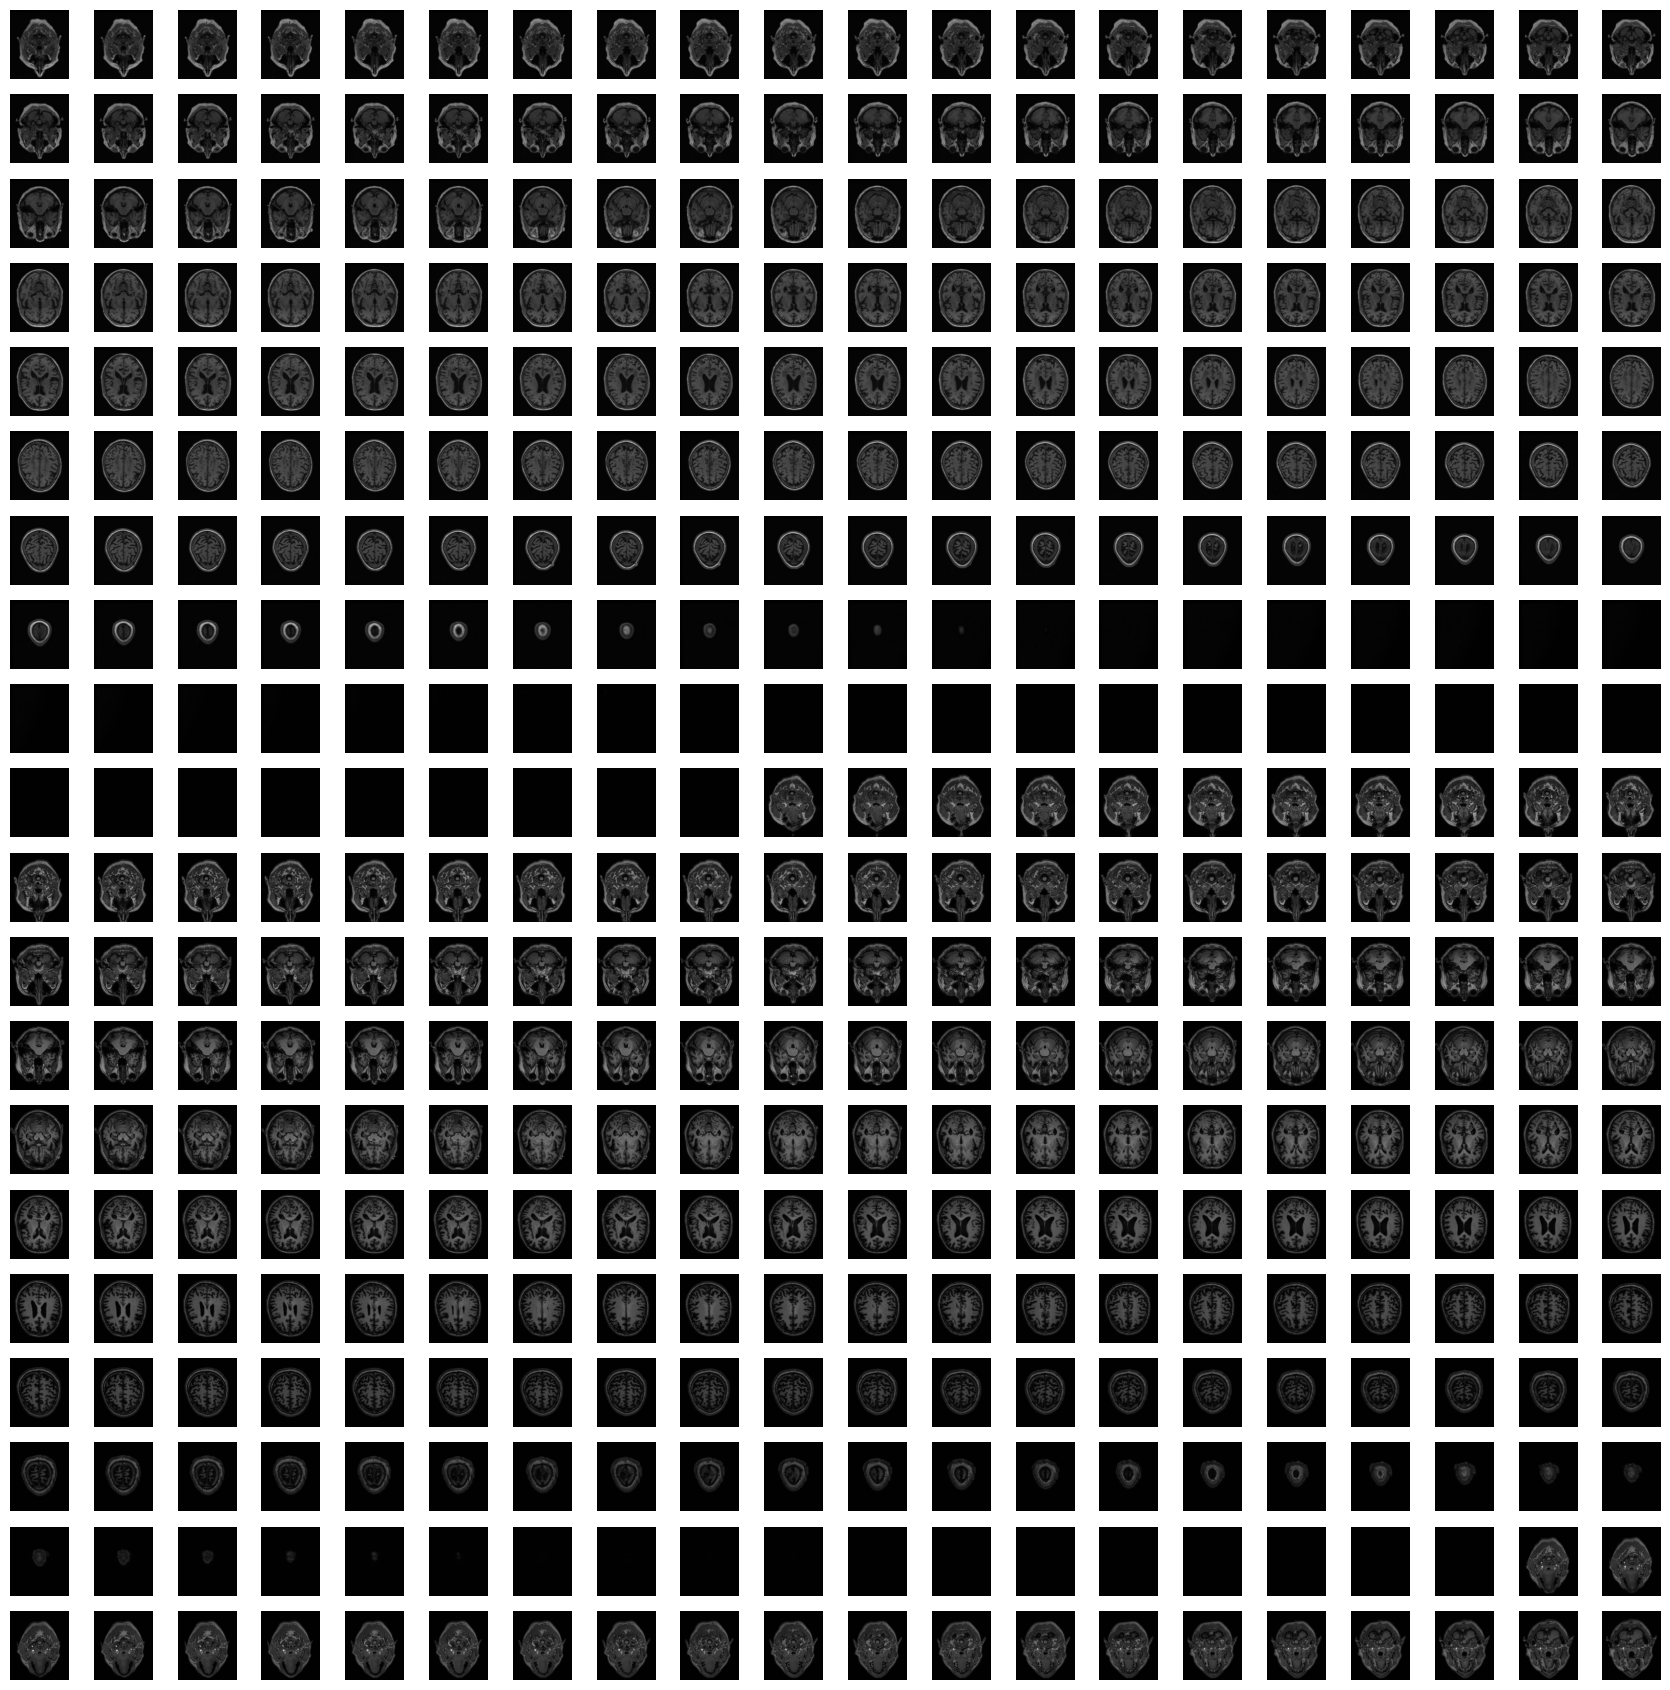

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a grid of subplots with 20 rows and 20 columns
figure, axis = plt.subplots(20, 20, figsize=(17, 17))

# Iterate through each subplot in the grid
for indexing, operations in enumerate(axis.flat):
    
    # Read an example image from the sorted list of image paths and convert it to RGB format
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[indexing]), cv2.COLOR_BGR2RGB)
    
    # Display the image on the current subplot
    operations.imshow(Example_IMG)
    
    # Turn off axis labels
    operations.axis("off")

# Adjust layout to make sure subplots are properly arranged
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('VisualizeData_MRI_Segmentation.jpeg')

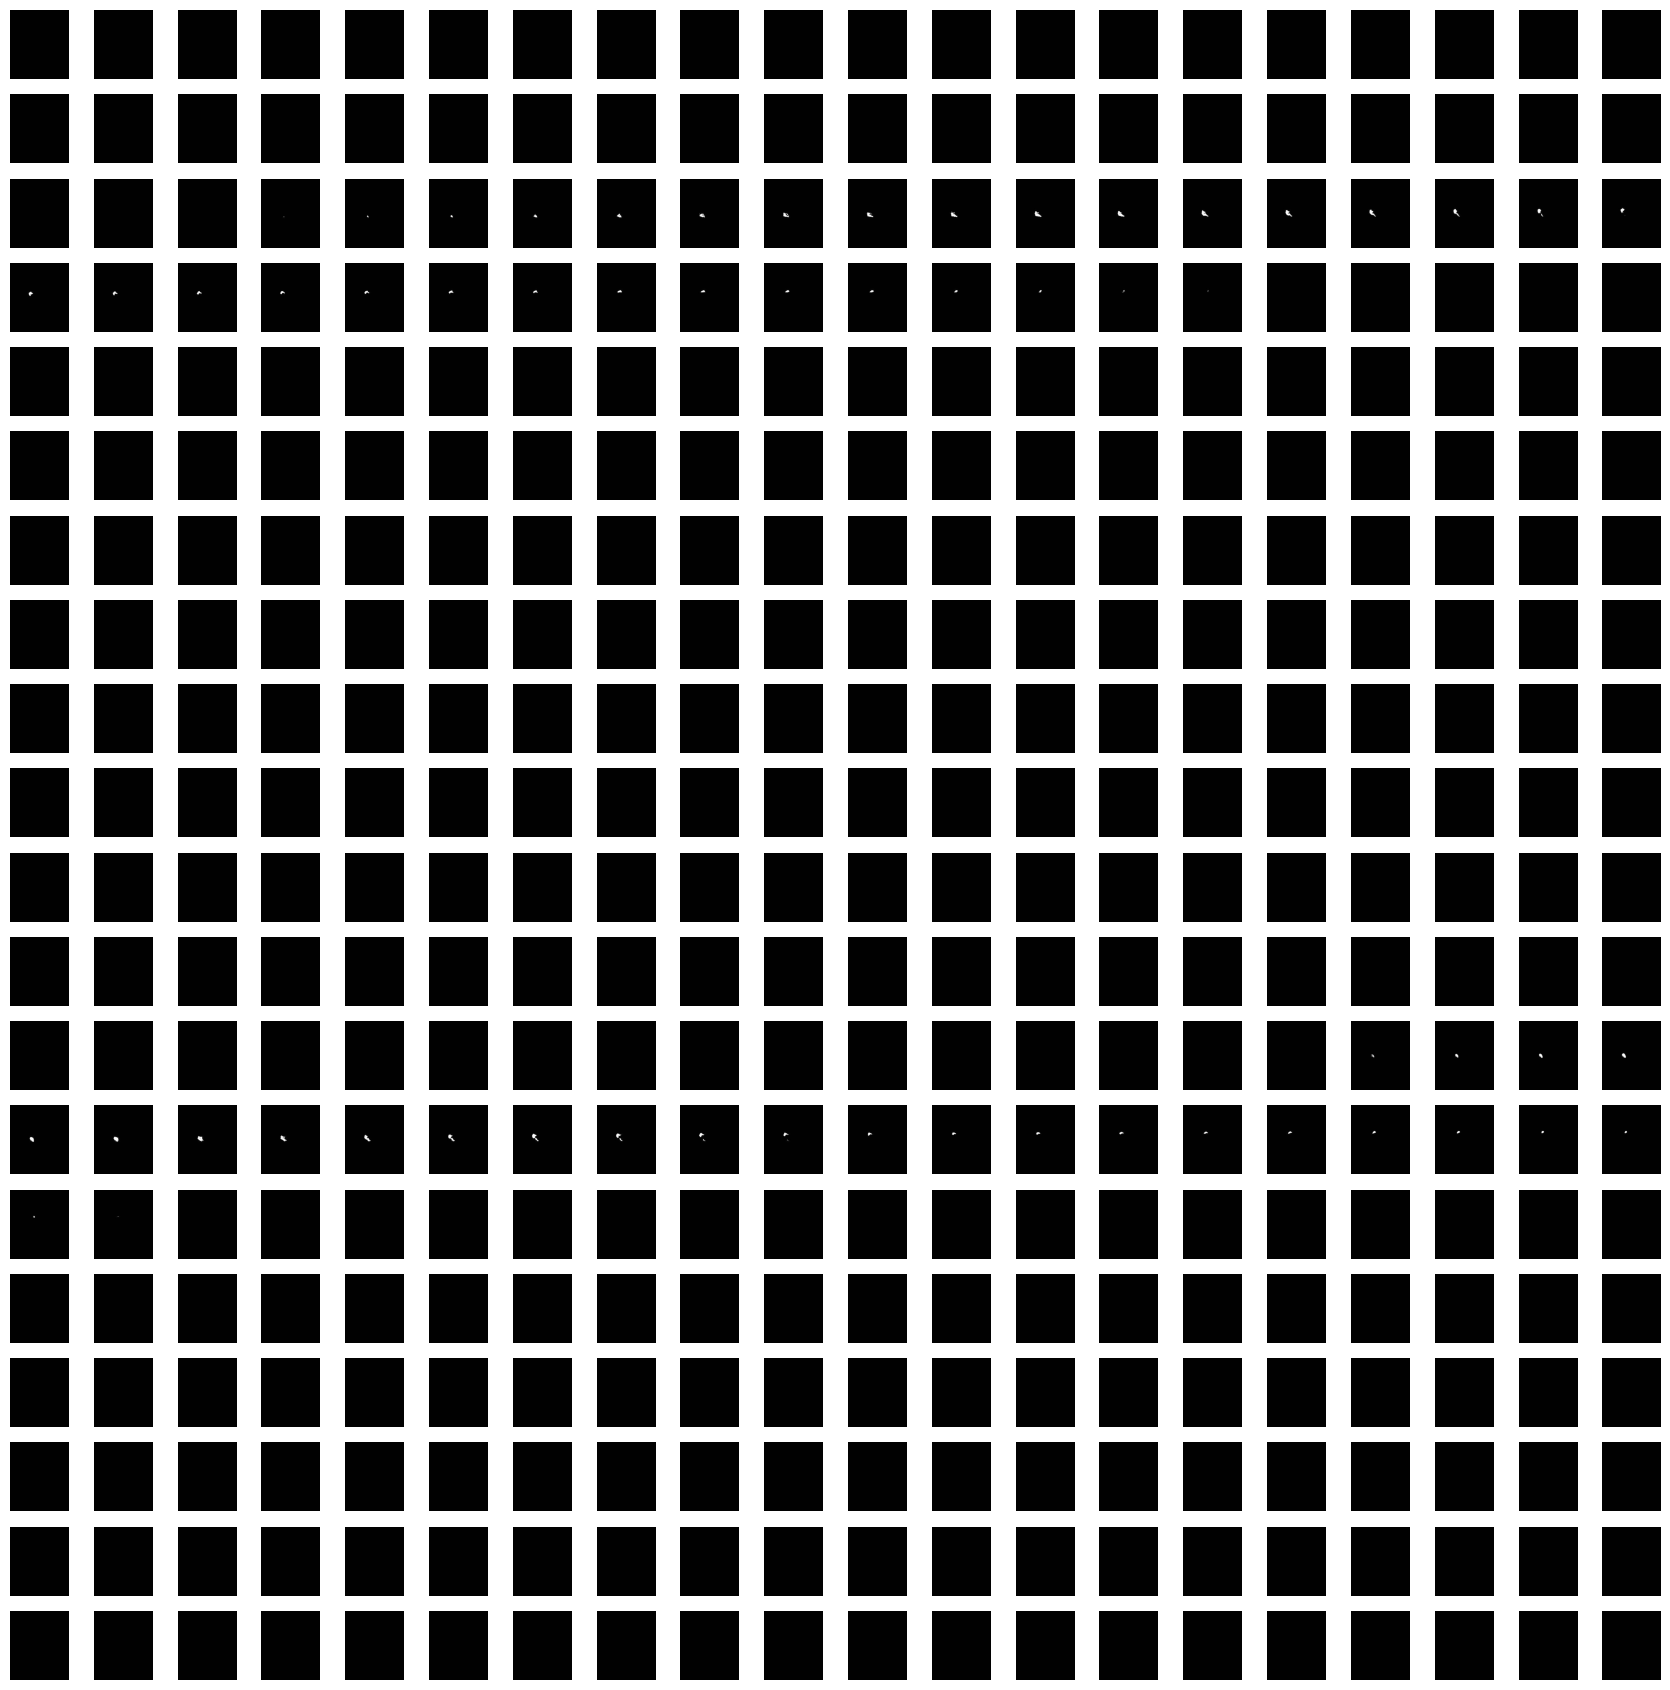

<Figure size 640x480 with 0 Axes>

In [7]:
# Create a grid of subplots with 20 rows and 20 columns
figure, axis = plt.subplots(20, 20, figsize=(17, 17))

# Iterate through each subplot in the grid
for indexing, operations in enumerate(axis.flat):
    
    # Read an example left MRI image from the sorted list of left image paths and convert it to RGB format
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_L[indexing]), cv2.COLOR_BGR2RGB)
    
    # Display the image on the current subplot
    operations.imshow(Example_IMG)
    
    # Turn off axis labels
    operations.axis("off")

# Adjust layout to make sure subplots are properly arranged
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('VisualizeData_MRILeft_Segmentation.jpeg')

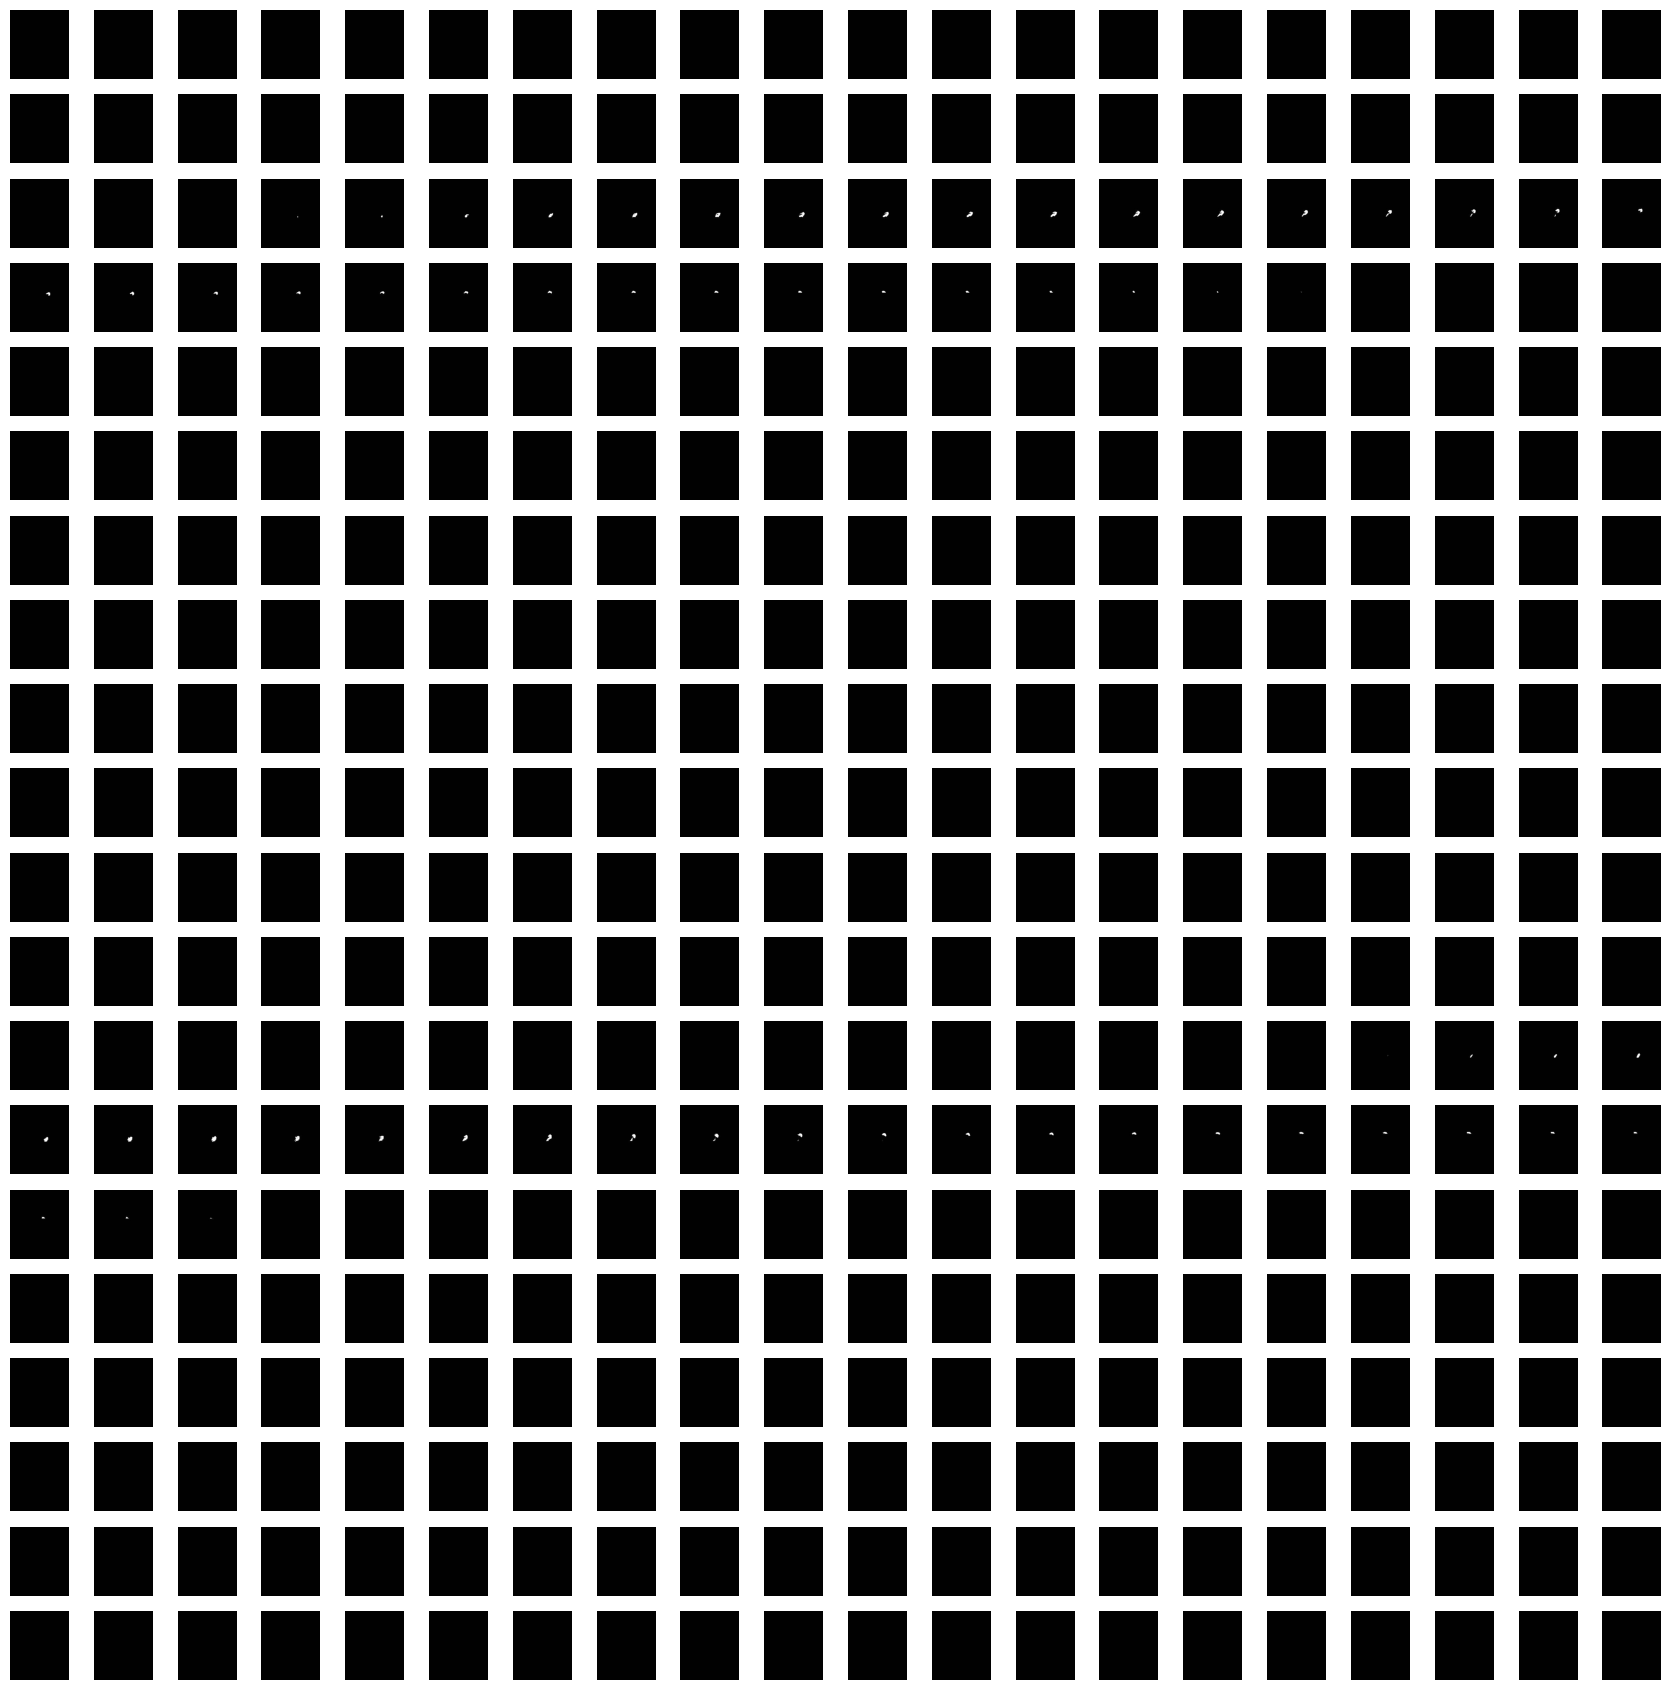

In [39]:
# Create a grid of subplots with 20 rows and 20 columns
figure, axis = plt.subplots(20, 20, figsize=(17, 17))

# Iterate through each subplot in the grid
for indexing, operations in enumerate(axis.flat):
    
    # Read an example right MRI image from the sorted list of right image paths and convert it to RGB format
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_R[indexing]), cv2.COLOR_BGR2RGB)
    
    # Display the image on the current subplot
    operations.imshow(Example_IMG)
    
    # Turn off axis labels
    operations.axis("off")

# Adjust layout to make sure subplots are properly arranged
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('VisualizeData_MRIRight_Segmentation.jpeg')

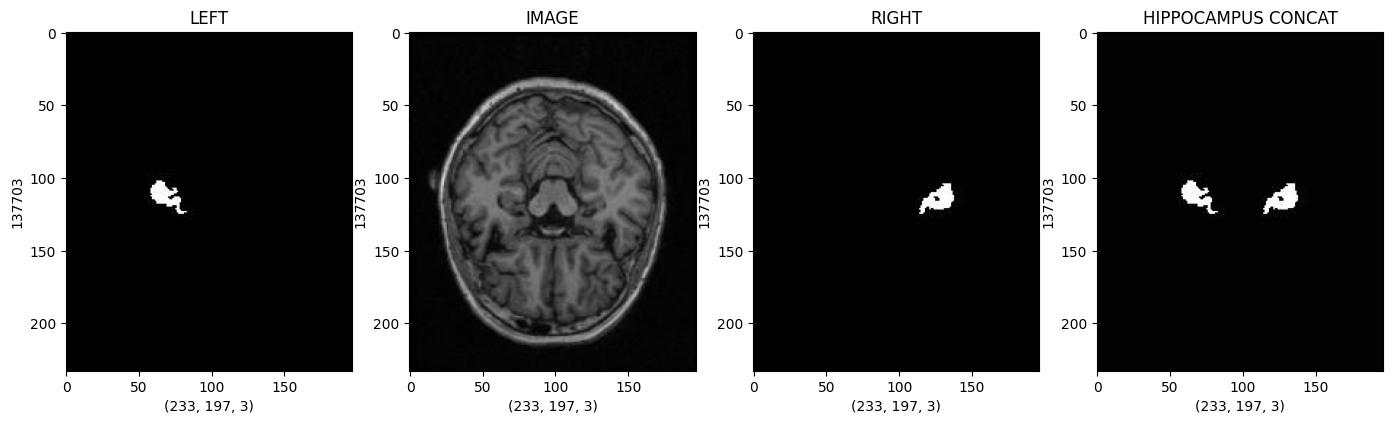

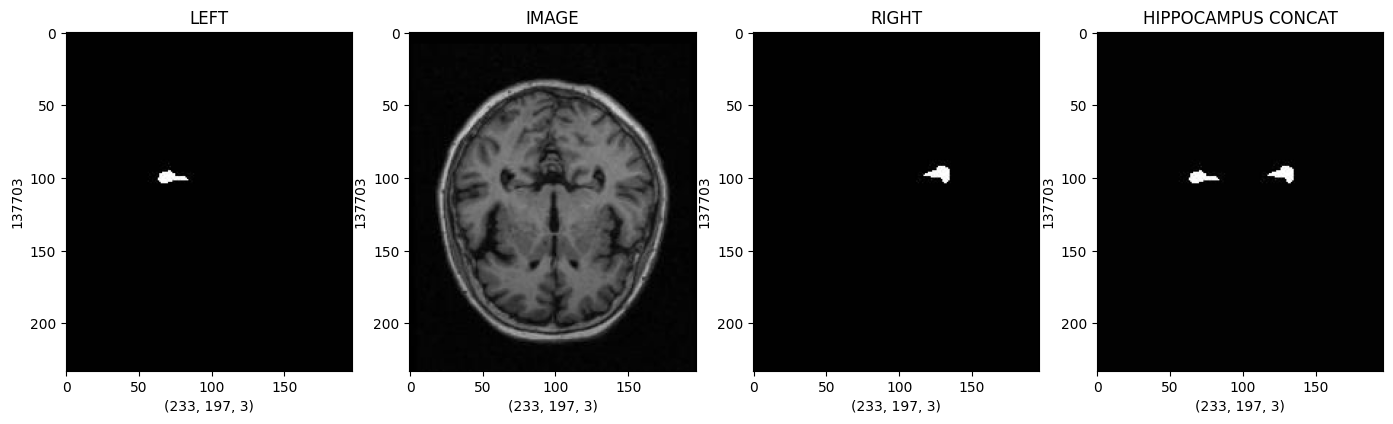

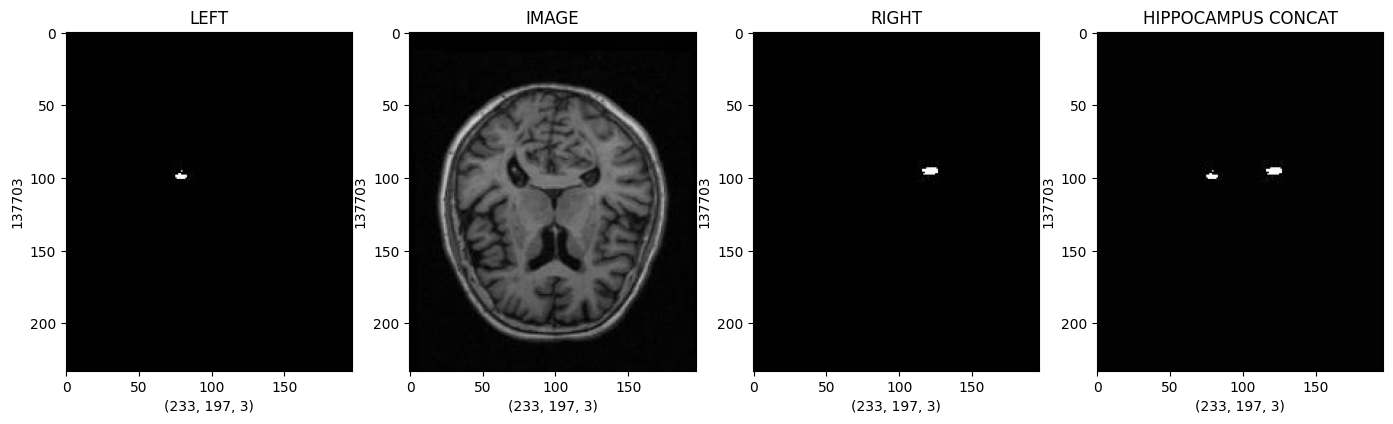

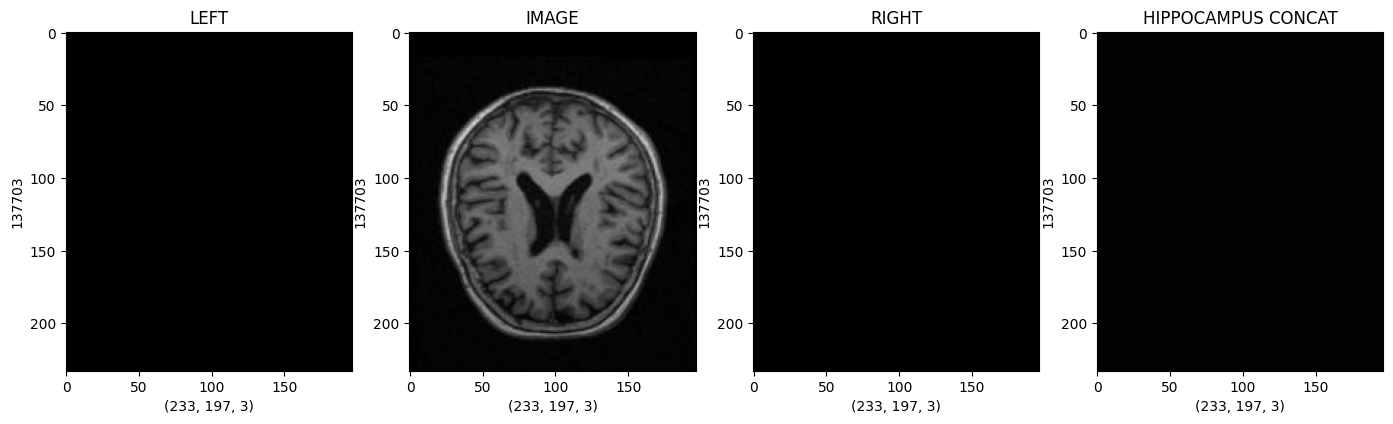

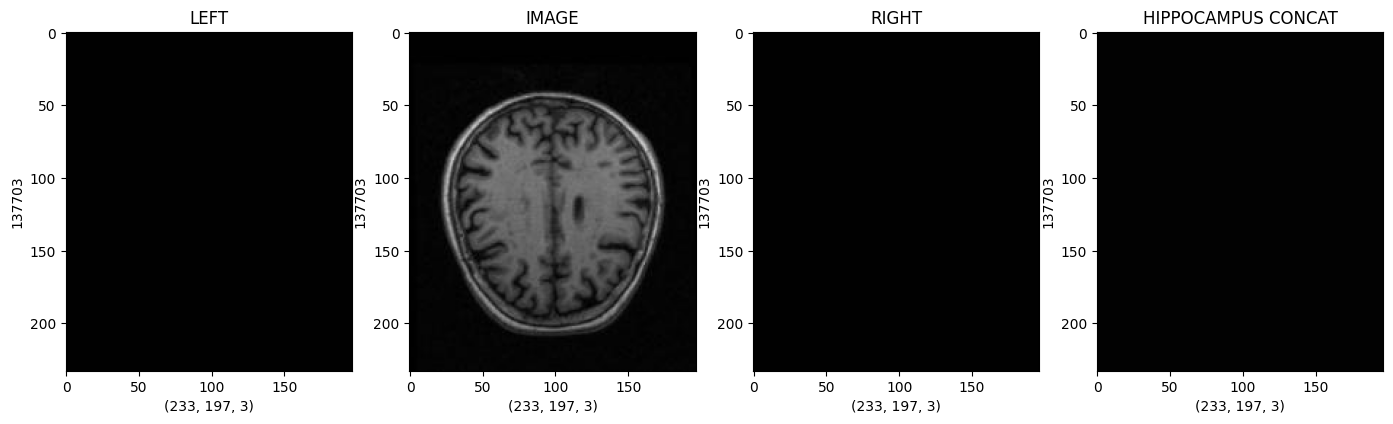

In [72]:
# Loop through 5 different figure numbers
for NumberFigure in range(5):
    
    # Create a figure with 1 row and 4 columns of subplots
    figure, axis = plt.subplots(1, 4, figsize=(17, 17))
    
    # Calculate the index offset for image selection
    NumberFigure = 1000 + NumberFigure * 10
    
    # Read left, right, and combined hippocampus images
    Example_L = cv2.cvtColor(cv2.imread(Sort_L[NumberFigure]), cv2.COLOR_BGR2RGB)
    Example_R = cv2.cvtColor(cv2.imread(Sort_R[NumberFigure]), cv2.COLOR_BGR2RGB)
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[NumberFigure]), cv2.COLOR_BGR2RGB)
    
    # Create a combined hippocampus image
    Hıppocampus_Concat = cv2.addWeighted(Example_L, 1, Example_R, 1, 0.2)

    # Set labels, titles, and display images in subplots
    axis[0].set_xlabel(Example_L.shape)
    axis[0].set_ylabel(Example_L.size)
    axis[0].set_title("LEFT")
    axis[0].imshow(Example_L)

    axis[1].set_xlabel(Example_IMG.shape)
    axis[1].set_ylabel(Example_IMG.size)
    axis[1].set_title("IMAGE")
    axis[1].imshow(Example_IMG)

    axis[2].set_xlabel(Example_R.shape)
    axis[2].set_ylabel(Example_R.size)
    axis[2].set_title("RIGHT")
    axis[2].imshow(Example_R)

    axis[3].set_xlabel(Hıppocampus_Concat.shape)
    axis[3].set_ylabel(Hıppocampus_Concat.size)
    axis[3].set_title("HIPPOCAMPUS CONCAT")
    axis[3].imshow(Hıppocampus_Concat)

    # Save each figure as an image file
    plt.savefig(f'VisualizeData_HippocampusConcat_Segmentation_{NumberFigure}.jpeg')

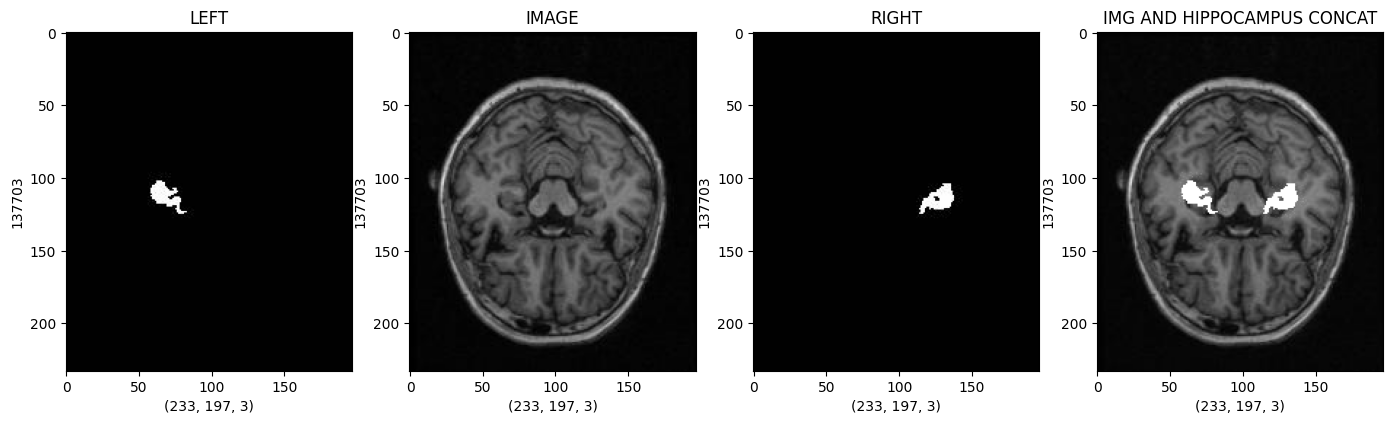

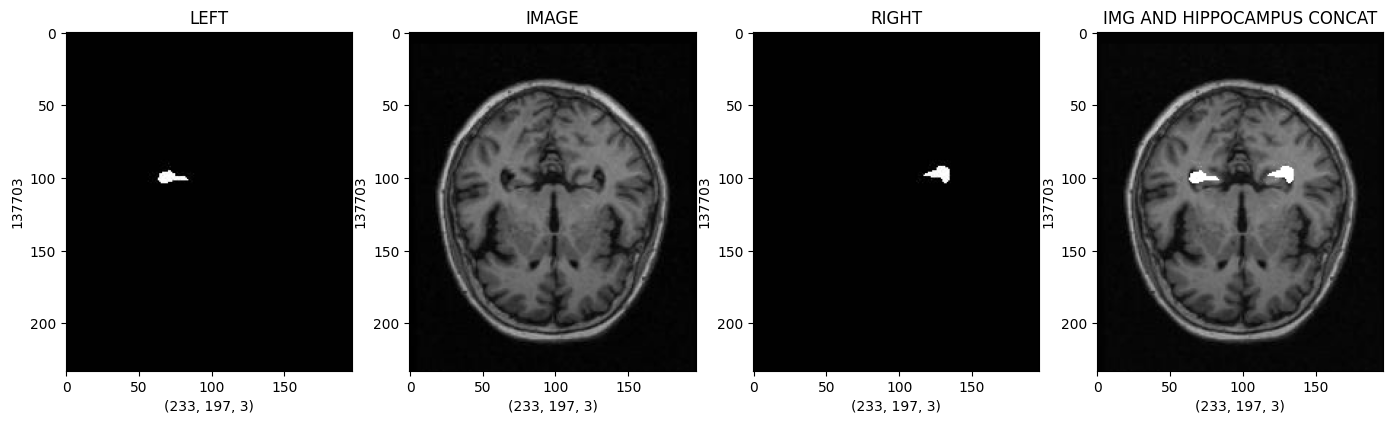

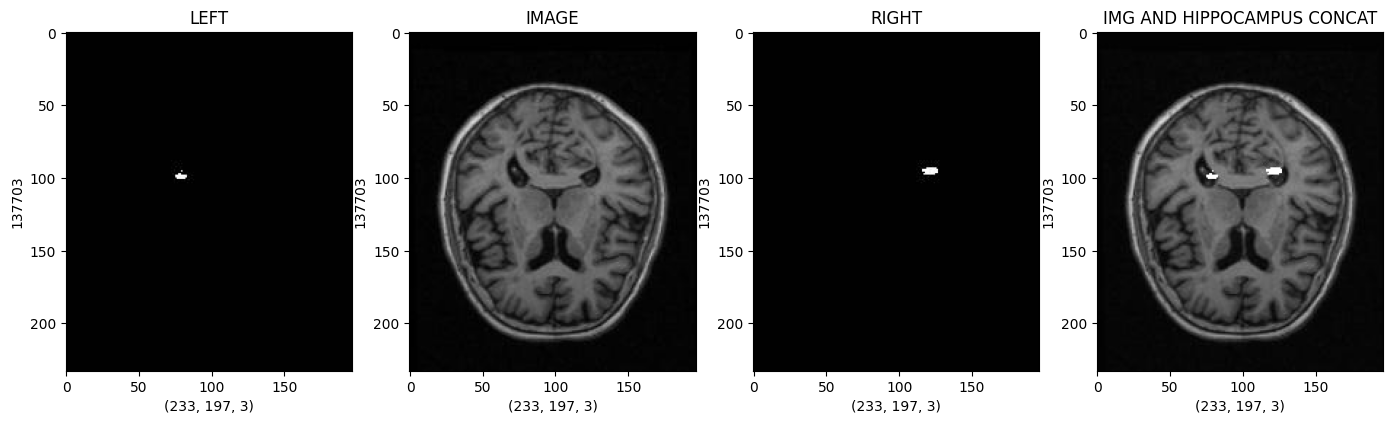

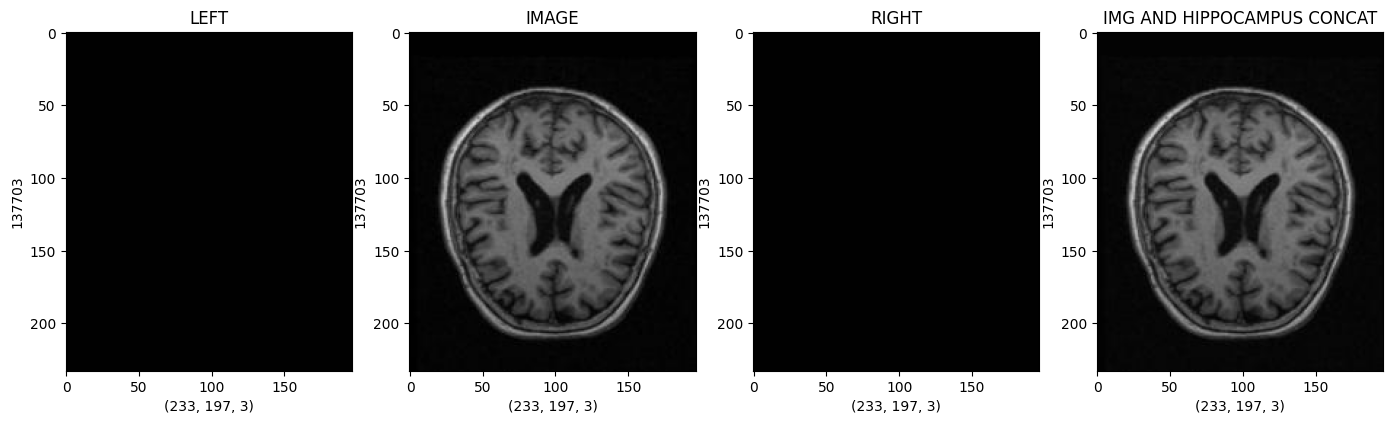

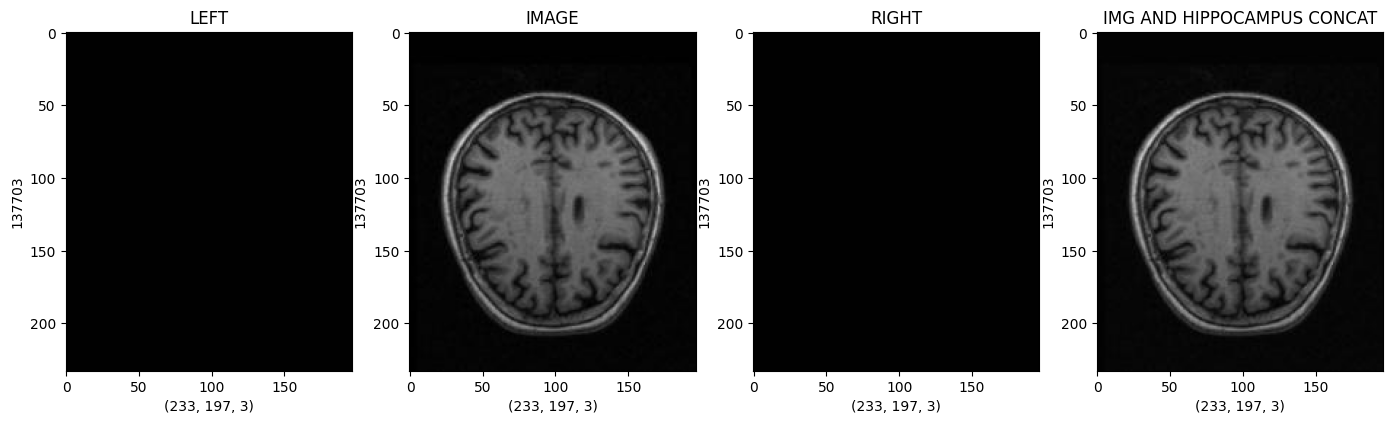

In [8]:
for NumberFigure in range(5):
    
    # Create a figure with 1 row and 4 columns of subplots
    figure, axis = plt.subplots(1, 4, figsize=(17,17))
    
    # Calculate the index offset for image selection
    NumberFigure = 1000 + NumberFigure * 10

    # Read left, right, and original images
    Example_L = cv2.cvtColor(cv2.imread(Sort_L[NumberFigure]), cv2.COLOR_BGR2RGB)
    Example_R = cv2.cvtColor(cv2.imread(Sort_R[NumberFigure]), cv2.COLOR_BGR2RGB)
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[NumberFigure]), cv2.COLOR_BGR2RGB)
    
    # Create a combined hippocampus image
    Hıppocampus_Concat = cv2.addWeighted(Example_L, 1, Example_R, 1, 0.2)
    
    # Create a combined image of original and hippocampus
    Main_Concat = cv2.addWeighted(Example_IMG, 1, Hıppocampus_Concat, 1, 0.2)

    # Set labels, titles, and display images in subplots
    axis[0].set_xlabel(Example_L.shape)
    axis[0].set_ylabel(Example_L.size)
    axis[0].set_title("LEFT")
    axis[0].imshow(Example_L)

    axis[1].set_xlabel(Example_IMG.shape)
    axis[1].set_ylabel(Example_IMG.size)
    axis[1].set_title("IMAGE")
    axis[1].imshow(Example_IMG)

    axis[2].set_xlabel(Example_R.shape)
    axis[2].set_ylabel(Example_R.size)
    axis[2].set_title("RIGHT")
    axis[2].imshow(Example_R)

    axis[3].set_xlabel(Main_Concat.shape)
    axis[3].set_ylabel(Main_Concat.size)
    axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
    axis[3].imshow(Main_Concat)
    
    # Save each figure as an image file
    plt.savefig(f'VisualizeData_ImgAndHippocampusConcat_Segmentation_{NumberFigure}.jpeg')

    # Show the plot
    plt.show()

In [9]:
# Initialize empty lists to store preprocessed image data
X_Image = []
X_Hippocampus = []

# Iterate through sorted lists of original images, left images, and right images simultaneously
for x_image, x_l, x_r in zip(Sort_IMG, Sort_L, Sort_R):
    
    # Read left, right, and original images using OpenCV and convert them to RGB format
    Picking_L = cv2.cvtColor(cv2.imread(x_l), cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r), cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image), cv2.COLOR_BGR2RGB)
    
    # Combine left and right images to form the hippocampus image
    Hıppocampus_Concat = cv2.addWeighted(Picking_L, 1, Picking_R, 1, 0.2)
   
    # Normalize the pixel values of original and hippocampus images by dividing each by 255
    Picking_IMG = Picking_IMG / 255.
    Hıppocampus_Concat = Hıppocampus_Concat / 255.
    
    # Append the normalized original and hippocampus images to their respective lists
    X_Image.append(Picking_IMG)
    X_Hippocampus.append(Hıppocampus_Concat)


In [75]:
Image_New = []
Hippocampus_Mask = []

for x_image,x_l,x_r in zip(Sort_IMG[:1500],Sort_L[:1500],Sort_R[:1500]):
    
    Picking_L = cv2.cvtColor(cv2.imread(x_l),cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Picking_L,1,Picking_R,1,0.2)
        
    Picking_IMG = Picking_IMG / 255.
    Hıppocampus_Concat = Hıppocampus_Concat / 255.
    
    Image_New.append(Picking_IMG)
    Hippocampus_Mask.append(Hıppocampus_Concat)

In [76]:
Image_Array = np.array(X_Image,dtype="float32")
Hippocampus_Array = np.array(X_Hippocampus,dtype="float32")
# Assuming Hippocampus_Array is RGB data, convert it to grayscale
Hippocampus_Gray = np.mean(Hippocampus_Array, axis=3, keepdims=True)

Image_New = np.array(Image_New,dtype="float32")
Hippocampus_Mask = np.array(Hippocampus_Mask,dtype="float32")

# **Create Architecture. Second Model**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ ?                      │   0 (unbuilt) │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ ?                      │   0 (unbuilt) │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ ?                      │   0 (unbuilt) │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

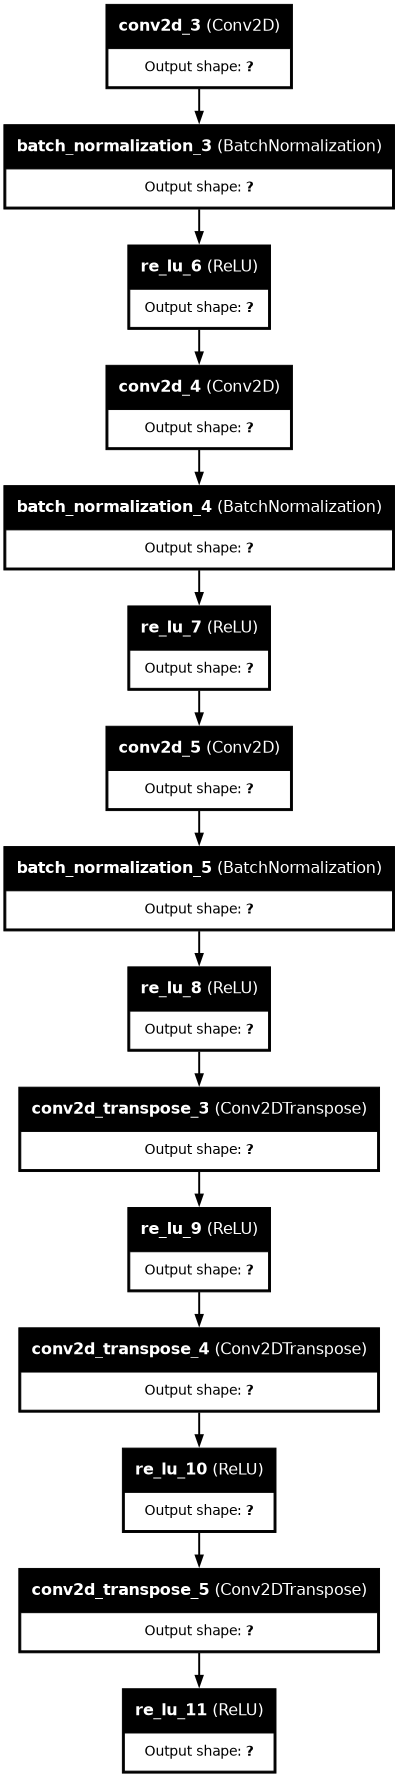

In [11]:
# Creating a Sequential model by stacking layers
ModelSegmentation = Sequential([
    #Encoder
    Conv2D(32,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),
    Conv2D(64,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),
    Conv2D(128,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),
    
    #Decoder
    Conv2DTranspose(64,(2,2)),
    ReLU(),
    Conv2DTranspose(32,(2,2)),
    ReLU(),
    Conv2DTranspose(1,(2,2)),
    ReLU()
])

# Printing the summary of the model architecture
ModelSegmentation.summary()

# Building the model with a specified input shape
ModelSegmentation.build()

# Plotting the model architecture0
tf.keras.utils.plot_model(
    ModelSegmentation,
    to_file='Architecture_Segmentation.png',
    show_shapes=True,  # Displaying shapes of input/output tensors in the plot
    show_dtype=False,  # Hiding data types of tensors in the plot
    show_layer_names=True,  # Displaying names of layers in the plot
    rankdir='TB',  # Orientation of the plot (Top to Bottom)
    expand_nested=False,  # Flattening nested models for visualization
    dpi=70  # Dots per inch for the plot
)

In [48]:
ModelSegmentation.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.000001),metrics=["mse"])

# **Training. Second Model**

In [54]:
# Training the model and capturing the history
history = ModelSegmentation.fit(Image_Array[:3000], Hippocampus_Gray[:3000], epochs=25, validation_split=0.2)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - loss: 0.1060 - mse: 0.0030 - val_loss: 0.1039 - val_mse: 0.0032
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 359ms/step - loss: 0.1041 - mse: 0.0029 - val_loss: 0.1035 - val_mse: 0.0031
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - loss: 0.1057 - mse: 0.0029 - val_loss: 0.1034 - val_mse: 0.0030
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 348ms/step - loss: 0.1052 - mse: 0.0029 - val_loss: 0.1032 - val_mse: 0.0030
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 353ms/step - loss: 0.1061 - mse: 0.0028 - val_loss: 0.1028 - val_mse: 0.0029
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 352ms/step - loss: 0.1060 - mse: 0.0028 - val_loss: 0.1027 - val_mse: 0.0028
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 350ms/step - loss: 0.1049 - mse: 0.0027 - val_loss: 0.1025 - val_mse: 0.0028
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - loss: 0.1064 - mse: 0.0027 - val_loss: 0.1024 - val_mse: 0.0027
Epoch 9/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 352ms/

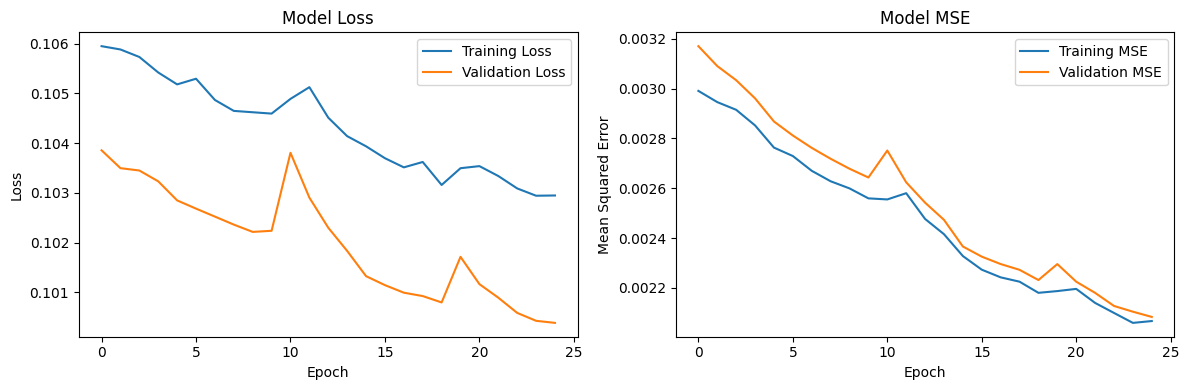

<Figure size 640x480 with 0 Axes>

In [56]:
# Function to plot training and validation loss and accuracy
def plot_history(history):
    # Summarize history for loss
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    # Summarize history for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'], label='Training MSE')
    plt.plot(history.history['val_mse'], label='Validation MSE')
    plt.title('Model MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    plt.savefig('ModelLossAndMSE_Segmentation.jpeg')

# Call the function to plot the history
plot_history(history)

# **Prediction. First Model**

In [64]:
# Make predictions using the segmentation model on the first 3200 images in the array
Prediction_ModelSegmentation = ModelSegmentation.predict(Image_Array[0:3200])

100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step


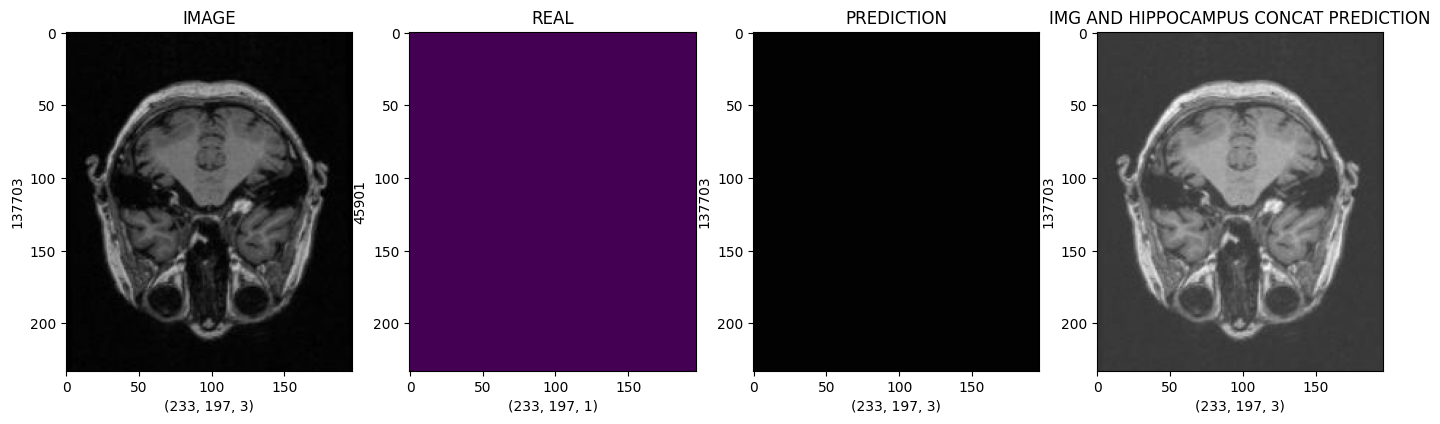

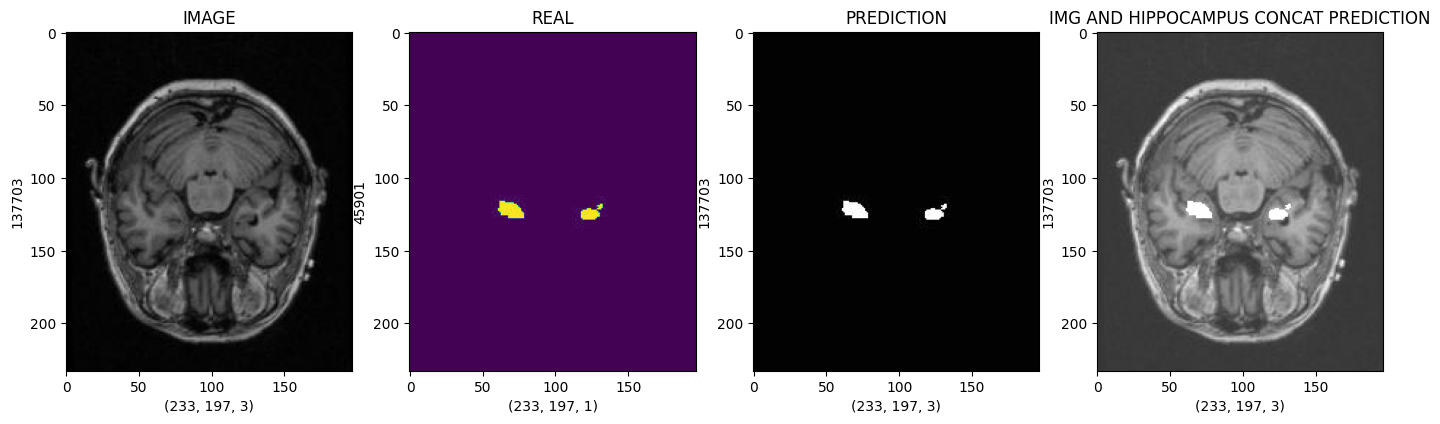

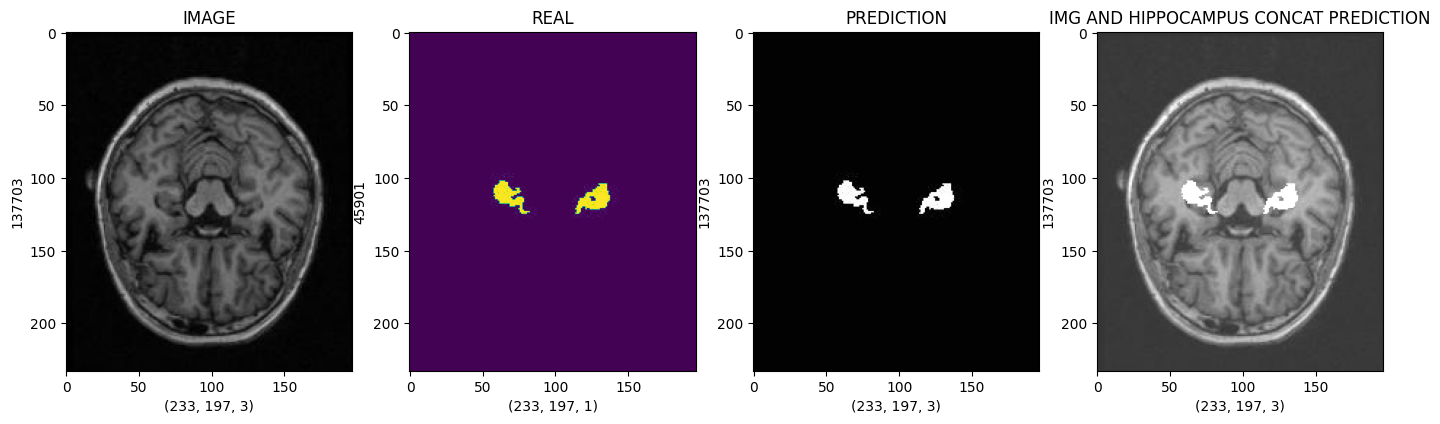

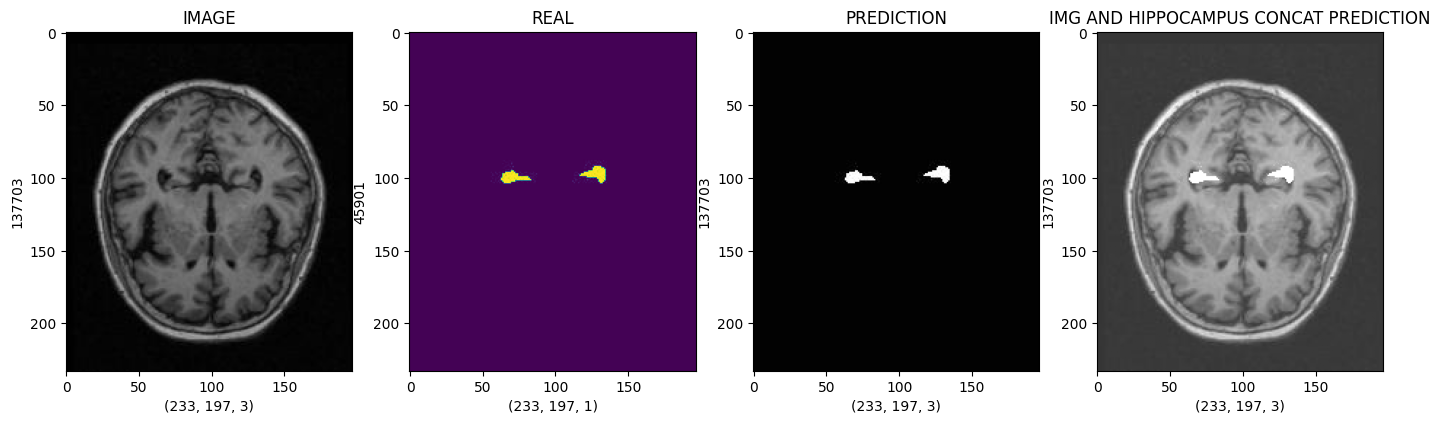

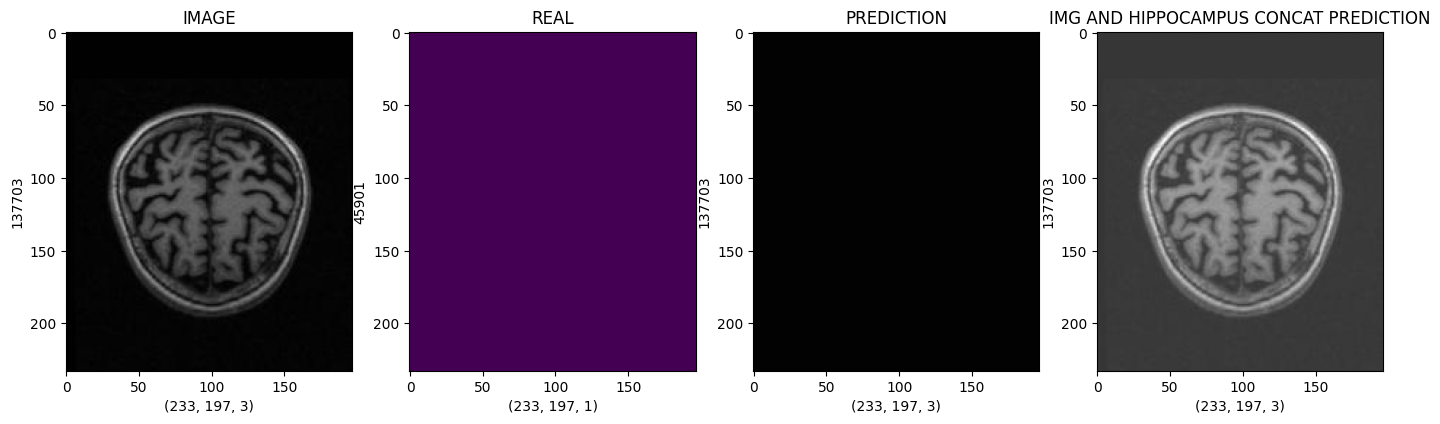

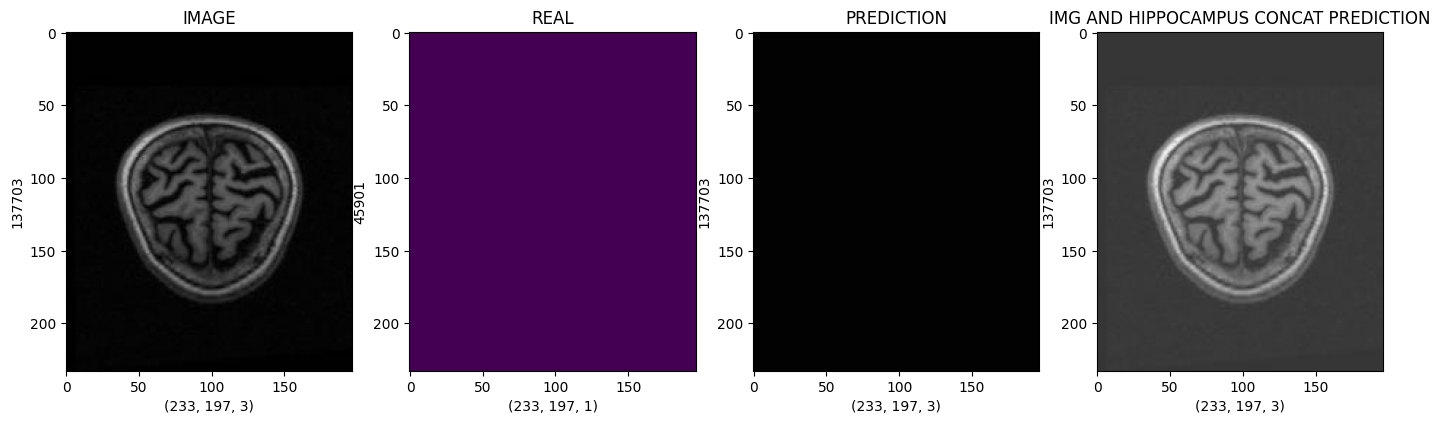

In [67]:
# Loop through a set number of figures, here it's 10
for NumberFigure in range(10):
    
    # Create a figure with 1 row and 4 columns of subplots, with each subplot being of size 17x17 inches
    figure, axis = plt.subplots(1, 4, figsize=(17, 17))
    
    # Calculate the image index by adding an offset
    NumberFigure = 980 + NumberFigure * 10

    # Select the images based on the current index
    Original_Img = Image_Array[NumberFigure]             # Original input image
    Real_Hippocampus = Hippocampus_Gray[NumberFigure]    # Ground truth hippocampus mask
    Predict_Hippocampus = Hippocampus_Array[NumberFigure] # Predicted hippocampus mask
    
    # Create an overlay of the original image and the predicted hippocampus mask
    Predict_Concat = cv2.addWeighted(Original_Img, 1, Predict_Hippocampus, 1, 0.2)

    # Display the original image
    axis[0].imshow(Original_Img)
    axis[0].set_xlabel(Original_Img.shape)
    axis[0].set_ylabel(Original_Img.size)
    axis[0].set_title("IMAGE")

    # Display the ground truth hippocampus mask
    axis[1].imshow(Real_Hippocampus)
    axis[1].set_xlabel(Real_Hippocampus.shape)
    axis[1].set_ylabel(Real_Hippocampus.size)
    axis[1].set_title("REAL")

    # Display the predicted hippocampus mask
    axis[2].imshow(Predict_Hippocampus)
    axis[2].set_xlabel(Predict_Hippocampus.shape)
    axis[2].set_ylabel(Predict_Hippocampus.size)
    axis[2].set_title("PREDICTION")

    # Display the overlay of the original image and the predicted hippocampus mask
    axis[3].imshow(Predict_Concat)
    axis[3].set_xlabel(Predict_Concat.shape)
    axis[3].set_ylabel(Predict_Concat.size)
    axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT PREDICTION")

    # Save the figure as a JPEG file with a name indicating the current index
    plt.savefig(f'Result{NumberFigure}_Segmentation.jpeg')

    # Display the plot
    plt.show()